<a href="https://colab.research.google.com/github/sanavalos/coupon-collector-problem/blob/main/Coupon_Collector_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Coupon Collector Problem
In probability theory, the coupon collector's problem refers to mathematical analysis of "collect all coupons and win" contests. It asks the following question: if each box of a given product contains a coupon, and there are 𝒩 different types of coupons, what is the probability that more than t boxes need to be bought to collect all 𝒩 coupons?

## Simulation
Simulation based on 𝒩=100 repetitions to estimate the average number of packs needed to fill the FIFA World Cup Qatar 2022 sticker album. Representing a histogram of the number of packs required to complete the album from the simulation results.

The World Cup Qatar 2022 album has ``total_cards=860``, and we assume each pack contains multiple cards: ``cards_pack=5``. Additionally, it is guaranteed that there are no duplicate cards within each pack.

To construct the simulation, since we need to estimate an expectation, I followed this approach:

1. **Random Experiment:** define the function ``packs_needed(total_cards, cards_pack)``, which, given the album size ``(total_cards)`` and the number of cards per pack ``(cards_pack)``, generates a new album, simulates filling it, and returns how many packs were required to complete it.

2. **Random Sample:** define a seed, set 𝒩, and create 𝒩=100 samples of ``packs_needed(total_cards, cards_pack)`` stored in samples.

3. **A Filter Function Characterizing Event 𝐸:** estimate P(𝐸) by the relative frequency of its occurrence in 𝒩 samples. We want to estimate an expectation and to do this, approximate it by its sample mean, i.e., the mean of samples. I use ``np.mean(samples)`` to have an estimate of the average number of packs needed to complete the FIFA World Cup Qatar 2022 album based on a simulation of 𝒩 replications.

4. **Graphical Representation of Histogram:** represent estimated expectation in a histogram.

Implemented a ``create_album(total_cards)`` function to create an album vector that contains a total of ``total_cards`` zeros. This vector represents the album where each position represents the status of a sticker with two values: 0, indicating the sticker has not yet been obtained, and 1, indicating it has been collected. The album starts with all positions set to 0, and as we buy packs, we start to fill it.

Implemented a ``buy_pack(total_cards, cards_pack)`` function that, given the number of cards per pack (cards_pack), generates a (list) pack of randomly chosen cards. In this case there are no duplicate cards per pack, so I used the ``rd.sample`` command since it allows us to sample cards without replacement.

Implemented a ``paste_cards(album, pack)`` function that updates the album vector with 1s for the cards found in the pack.

Implemented an ``album_incomplete(album)`` function that takes an album vector and returns ``True`` if the album is not yet complete, and ``False`` if it is.

Finally, used all these functions to create a single function that invokes them, called ``packs_needed(total_cards, cards_pack)``. This function should count the number of packs needed to complete the album. Also, created a ``packs_bought`` counter that starts at 0 and increments by 1 each time you buy a new pack.

In [ ]:
# 1. Random Experiment: Define the function packs_needed(total_cards, cards_pack)

import numpy as np
import random as rd

def create_album(total_cards):
    return np.zeros(total_cards)

def buy_pack(total_cards, cards_pack):
    return rd.sample(range(total_cards), cards_pack)

def paste_cards(album, pack):
    for sticker in pack:
        album[sticker] = 1
    return album

def album_incomplete(album):
    return 0 in album

def packs_needed(total_cards, cards_pack):
    album = create_album(total_cards)
    packs_bought = 0

    while album_incomplete(album):
        pack = buy_pack(total_cards, cards_pack)
        album = paste_cards(album, pack)
        packs_bought += 1

    return packs_bought


In [ ]:
# 2. Random Sample: Simulate 𝒩 repetitions

def simulate_repetitions(repetitions, total_cards, cards_pack):
    samples = [packs_needed(total_cards, cards_pack) for _ in range(repetitions)]
    return samples

total_cards = 860
cards_pack = 5
N = 100

rd.seed(42)

samples = simulate_repetitions(N, total_cards, cards_pack)


In [ ]:
# 3. Estimate the Sample Mean: Calculate the expected (average) number of packs

average_packs = np.mean(samples)
print(f"Estimated average number of packs needed: {average_packs}")

Estimated average number of packs needed: 1277.02


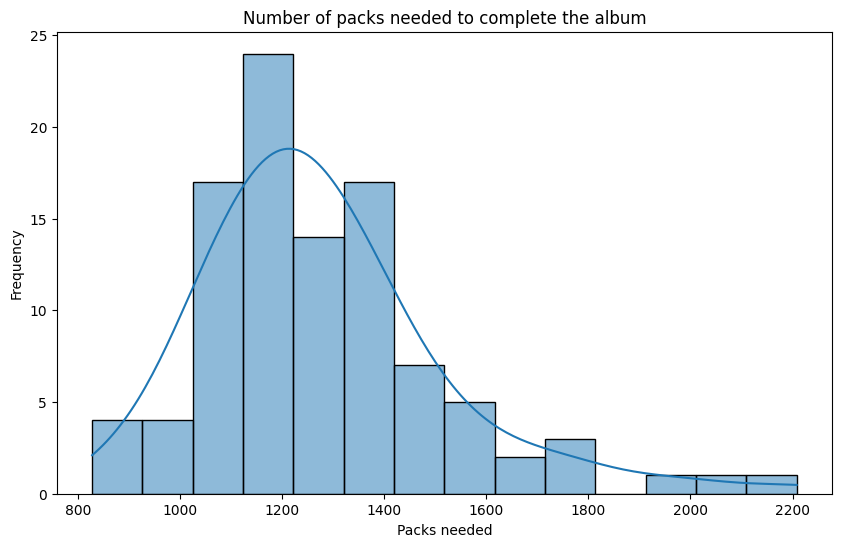

In [ ]:
# 4. Visualization - Display the histogram

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(samples, kde=True)
plt.title("Number of packs needed to complete the album")
plt.xlabel("Packs needed")
plt.ylabel("Frequency")
plt.show()